<a href="https://colab.research.google.com/github/Ahmad-Zuber/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg


### **Mountin Google Drive and import Airbnb File**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/MODULE-I/Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**As we see there are missing data which does not required special treatment so we drop some columns i.e. last_review, reviews_per_month. latitude and longitude type.**


In [ ]:
# Make a new dataframe by dropping unnecessory column
n_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
n_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


#Exploration Data and Visualizing

##Neighbourhood

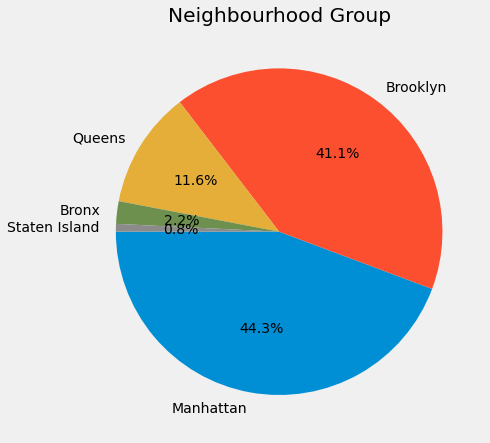

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(n_df.neighbourhood_group.value_counts(), labels=n_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.

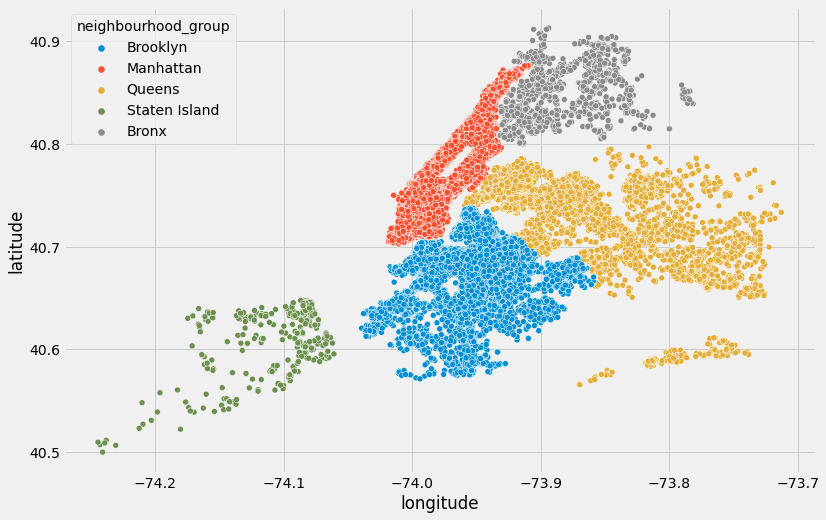

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=n_df.longitude,y=n_df.latitude,hue=n_df.neighbourhood_group)
plt.show()

##Unique Values

It is very important to understand and analyze the Unique values, this gives a lot of insight to the data and the user preference for a particular choice. We will take Room Type and Neighbourhood group

From the below, we have 3 types of room in the dataset and 5 different neighbourhood group. In the next section we will explore more on these two categories to understand the user distribution.

##Room Details


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


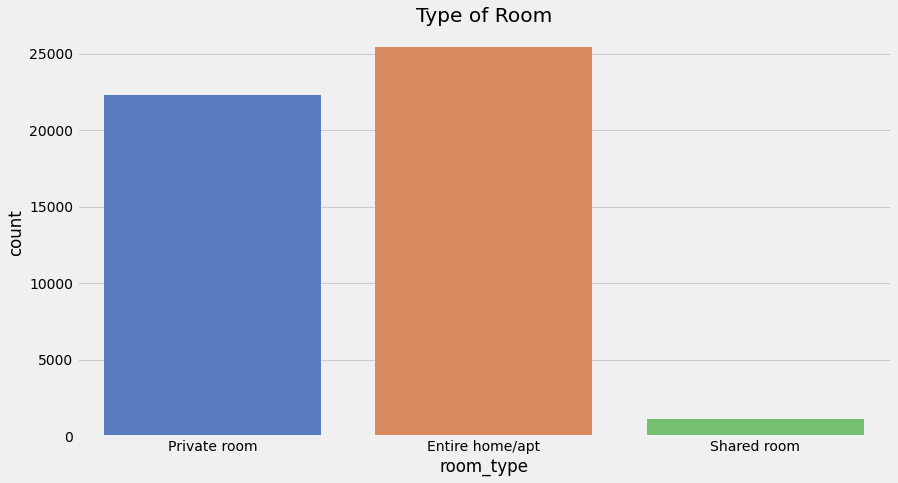

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(n_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.

Let’s see room types occupied by a neighborhood group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


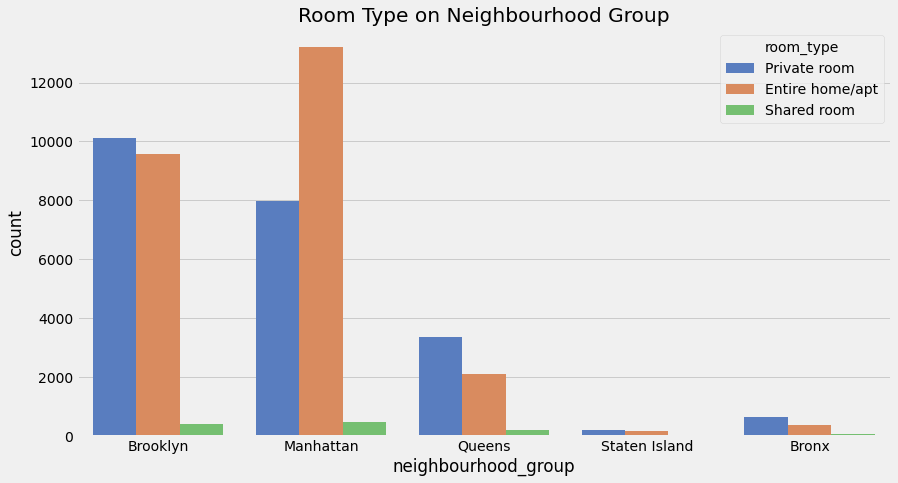

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(n_df.neighbourhood_group,hue=n_df.room_type, palette="muted")
plt.show()

## 1.What can we learn about different hosts and areas?


In [ ]:
host_areas = n_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count() .reset_index('neighbourhood_group')

In [ ]:
host_areas.sort_values(by='calculated_host_listings_count',ascending = False)

,neighbourhood_group,calculated_host_listings_count
host_name,,
Sonder (NYC),Manhattan,327
Blueground,Manhattan,230
Michael,Manhattan,212
David,Manhattan,202
Michael,Brooklyn,159
...,...,...
Jayd,Manhattan,1
Jayden,Manhattan,1
Jayden & Minea,Brooklyn,1


###As we can see most number of listings are from Manhattan group created host name Sonder(NYC), Bluegrund, Michael, David

In [ ]:
hosts_plot = host_areas.sort_values(by='calculated_host_listings_count',ascending = False).head(5)

Text(0, 0.5, 'calculated_host_listings_count')

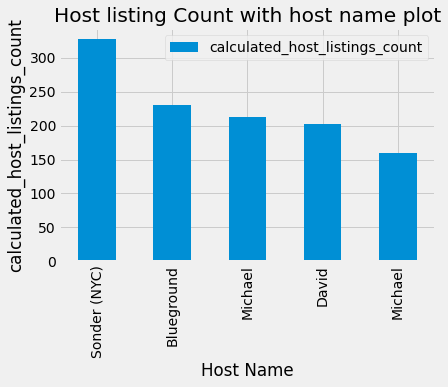

In [ ]:
hosts_plot.plot(kind ='bar')
plt.title("Host listing Count with host name plot")
plt.xlabel ('Host Name')
plt.ylabel ('calculated_host_listings_count')

# What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
area_reviews = n_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


In [ ]:
area_reviews.head()

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


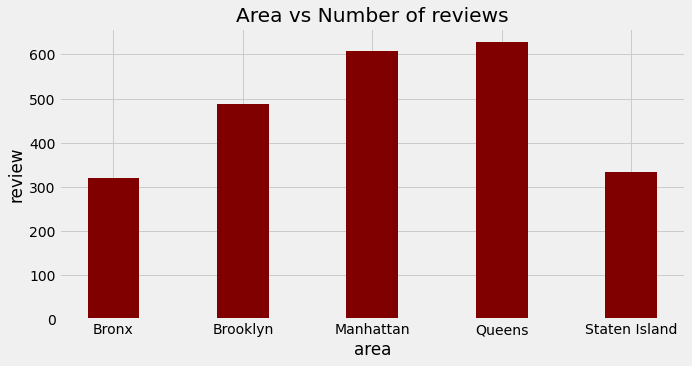

In [ ]:
area = area_reviews['neighbourhood_group']
review = area_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = n_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


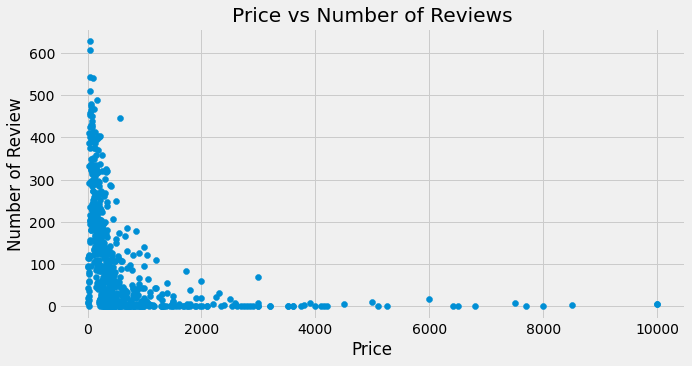

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

##From the above Analysis we can say that most people prefer to stay in place where price is less.

In [ ]:
price_reviews = area_reviews.sort_values(by='number_of_reviews', ascending=False).head(100)
price_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


##**Which hosts are the busiest and why?**


In [ ]:
busiest_hosts = n_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()

busiest_hosts

,host_name,host_id,room_type,number_of_reviews
0,'Cil,45354224,Private room,240
1,(Ari) HENRY LEE,40605120,Entire home/apt,3
2,(Email hidden by Airbnb),5610823,Entire home/apt,5
3,(Email hidden by Airbnb),7580102,Private room,6
4,(Email hidden by Airbnb),11495251,Entire home/apt,1
...,...,...,...,...
38943,빈나,112439306,Private room,1
38944,소정,79269209,Private room,0
38945,소정,133425456,Private room,1
38946,진,151728547,Entire home/apt,0


In [ ]:
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


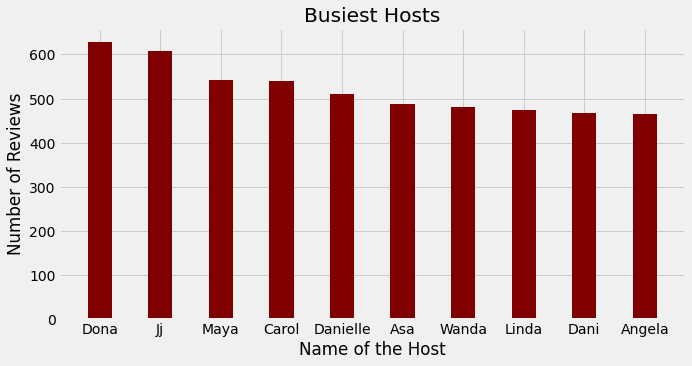

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()


##Busiest hosts are: 
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

##Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

##**Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
traffic_area = n_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_area = traffic_area.sort_values(by = 'minimum_nights', ascending = False)
traffic_area

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


<function matplotlib.pyplot.show>

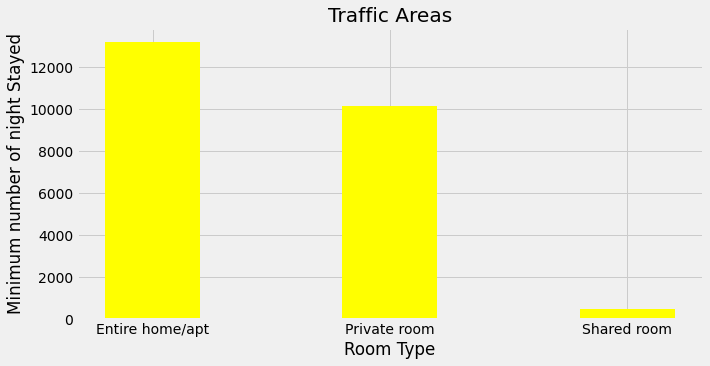

In [ ]:
room_type = traffic_area['room_type']
stayed = traffic_area['minimum_nights']

figure = plt.figure(figsize = (10,5))

#creating the bar plot
plt.bar(room_type, stayed, color = 'yellow',
        width = 0.4)
plt.xlabel('Room Type')
plt.ylabel('Minimum number of night Stayed')
plt.title('Traffic Areas')
plt.show

###From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

##Neighbourhood Group vs. Availability Room

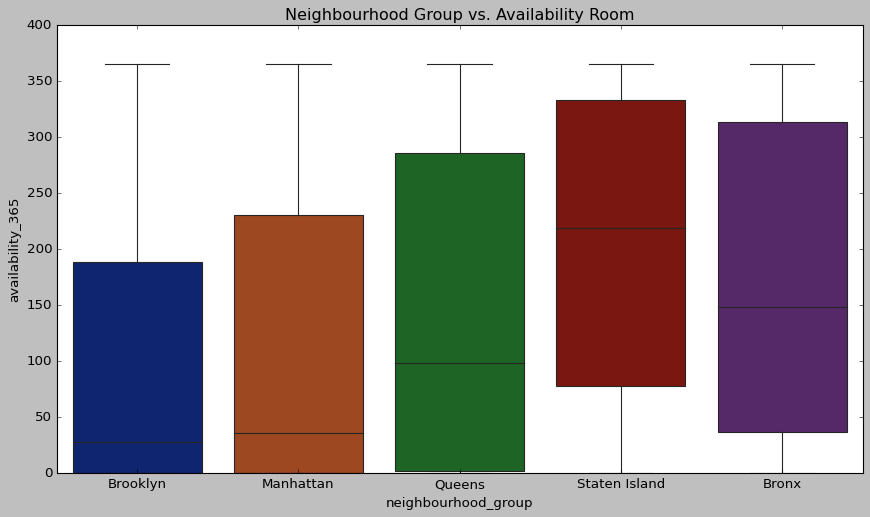

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=n_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()


The graph above shows the relationship between the availability room and neighborhood group.

##Neighbourhood Group Price Distribution

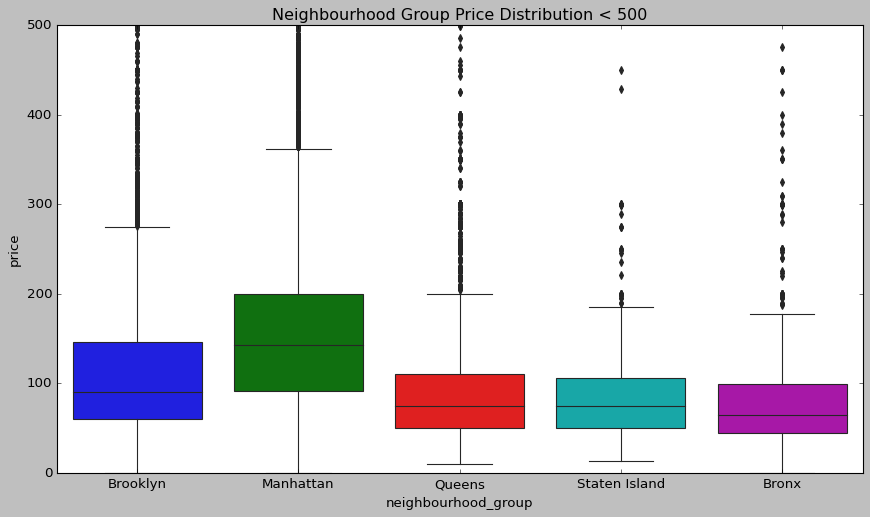

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = n_df[n_df.price<500])
plt.show()

From the boxplot above, we can definitely observe a couple of things about the distribution of prices for Airbnb in NYC.

1. We can state that Manhattan has the highest range price for the listings with about 140 as an average price, followed by Brooklyn with $90 per night.

2. Queens and Staten Island seem to have a very similar distribution.

3. The Bronx is the cheapest.

# ***Conclusion***

# **From the above analysis we can conclude that -**
## 1. People preferred both Entire room and Private Room.
## 2. Both room type entire room and private room mostly present in Manhattan, Brooklyn and Queens.
## 3. Room availability is less in busiest neighbourhood group.
## 4. Less number of people preferred shared rooms.
## 5. People preferred listings which are less in price.
## 6. Hosts listed room type as Entire home and Private room which is preferred by most number of people.
## 7. Bronx is the cheapest among all.
## 8. Most people prefer room which has less price.

---

